In [2]:
!pip install transformers
!pip install torch
!pip install bert-score

In [1]:
from bert_score import BERTScorer
from bert_score import score
import pandas as pd

In [16]:
d=pd.read_csv("gpt4_gold_exps.csv")

In [17]:
d["pred_exps"] = d["pred_exps"].fillna("nopred")
d["gold_exps"] = d["gold_exps"].fillna("nogold")

references=d['gold_exps'].tolist()
candidates=d['pred_exps'].tolist()

In [18]:
# Initialize the BERTScorer with the 'bert-base-uncased' model
scorer = BERTScorer(model_type='distilbert-base-uncased')   #bert-base-uncased

# Compute similarity scores
refs = references  # Reference texts
cands = candidates  # Candidate texts 

# The scorer returns precision, recall, and F1 score
p, r, f1 = scorer.score(refs, cands)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [87]:
#from statistics import mean
f1 = f1.tolist()
m = mean(f1)
m

0.8426089814972042

<Axes: ylabel='Count'>

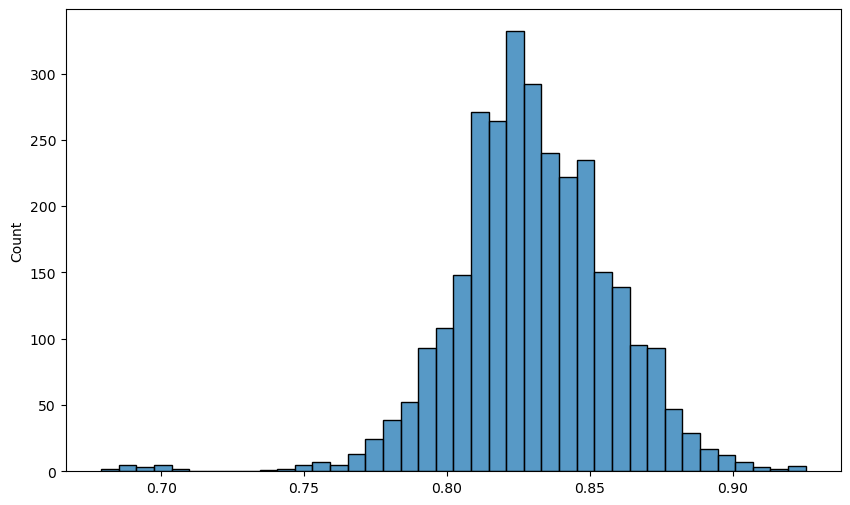

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt 


plt.figure(figsize=(10, 6))
sns.histplot(data=f1, bins=40)

In [19]:
d['f1'] = f1

In [20]:
d.groupby('functionality').mean()

/var/folders/8n/y42d4kpd5hn9kbrl5x13jqsw0000gn/T/ipykernel_23579/319878011.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d.groupby('functionality').mean()


,Unnamed: 0,case_id,ref_case_id,ref_templ_id,templ_id,params_temperature,f1
functionality,,,,,,,
abuse targeted at individuals (not as member of a protected group,2873.0,3005.000000,NaN,82.738462,669.000000,0.5,0.815282
abuse targeted at non protected groups (e.g. professions),2936.5,3069.209677,NaN,69.854839,733.209677,0.5,0.804811
abuse targeted at objects,2808.0,2940.000000,NaN,87.615385,604.000000,0.5,0.806315
dehumanisation (explicit),349.5,350.500000,NaN,NaN,50.500000,0.5,0.850367
denouncements of hate that make direct reference to it,2705.0,2815.638298,476.600000,84.400000,561.787234,0.5,0.843925
denouncements of hate that quote it,2548.0,2648.000000,652.127168,100.369942,542.549133,0.5,0.841886
description using very negative attributes (explicit),209.5,210.500000,NaN,NaN,30.500000,0.5,0.843174
direct threat,626.0,630.684211,NaN,NaN,90.526316,0.5,0.869325
expression of strong negative emotions (explicit),69.5,70.500000,NaN,NaN,10.500000,0.5,0.862525
